In [1]:
from numpy import asarray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)

# create model
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(8, 8, 1)))

# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
print(weights)

[array([[[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]]]), array([0.])]


In [2]:
# store the weights in the model
model.set_weights(weights)

# apply filter to input data
yhat = model.predict(data)
for r in range(yhat.shape[1]):
    # print each column in the row
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
#download mnist data and split into train and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

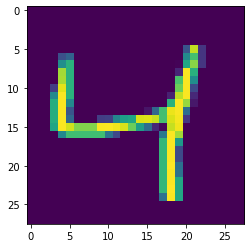

In [5]:
plt.imshow(train_images[2])
plt.show()

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
#create model
model = keras.models.Sequential()
#add model layers
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [9]:
(3*3 +1) * 64

640

In [10]:
(3*3*64 +1) * 32

18464

In [11]:
temp = keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))(train_images[:2])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [12]:
temp

<tf.Tensor: shape=(2, 26, 26, 64), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.       

In [13]:
keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))(train_images[:1])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(1, 26, 26, 64), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.       

In [14]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
#train the model
model.fit(train_images[:20000], train_labels[:20000], epochs=5)

Train on 20000 samples
Epoch 1/5
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.2268 - accuracy: 0.9311
Epoch 2/5
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.0690 - accuracy: 0.9791
Epoch 3/5
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.0415 - accuracy: 0.9869
Epoch 4/5
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.0269 - accuracy: 0.9919
Epoch 5/5
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.0205 - accuracy: 0.9933
